<font size="+3"><strong> Decision Trees Classifier </strong></font>

In [ ]:
# Import libraries
import json
import pickle

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

# Prepare Data

##Import

In [ ]:
def wrangle(filename):
      """
      The function takes the name of a decompressed file as input and returns a tidy DataFrame

      Parameters
      ----------

      filename : str
        The name of a decompressed JSON file

      Returns
      -------
      df : dataframe

      """
      #open decompressed file, load into dict
      with open (filename, "r") as f:
              data = json.load(f)
      # Turn dict into DataFrame
      df = pd.DataFrame().from_dict(data["data"]).set_index("id")

      return df

In [ ]:
# Read the data into dataframe `df`
df = wrangle("taiwan-bankruptcy-data.json")
print(df.shape)
df.head()

(6819, 96)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95,bankrupt
id,,,,,,,,,,,,,,,,,,,,,
1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469,True
2,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794,True
3,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474,True
4,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982,True
5,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490,True


## Explore

In [ ]:
# Inspect DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6819 entries, 1 to 6819
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feat_1    6819 non-null   float64
 1   feat_2    6819 non-null   float64
 2   feat_3    6819 non-null   float64
 3   feat_4    6819 non-null   float64
 4   feat_5    6819 non-null   float64
 5   feat_6    6819 non-null   float64
 6   feat_7    6819 non-null   float64
 7   feat_8    6819 non-null   float64
 8   feat_9    6819 non-null   float64
 9   feat_10   6819 non-null   float64
 10  feat_11   6819 non-null   float64
 11  feat_12   6819 non-null   float64
 12  feat_13   6819 non-null   float64
 13  feat_14   6819 non-null   float64
 14  feat_15   6819 non-null   float64
 15  feat_16   6819 non-null   float64
 16  feat_17   6819 non-null   float64
 17  feat_18   6819 non-null   float64
 18  feat_19   6819 non-null   float64
 19  feat_20   6819 non-null   float64
 20  feat_21   6819 non-null   floa

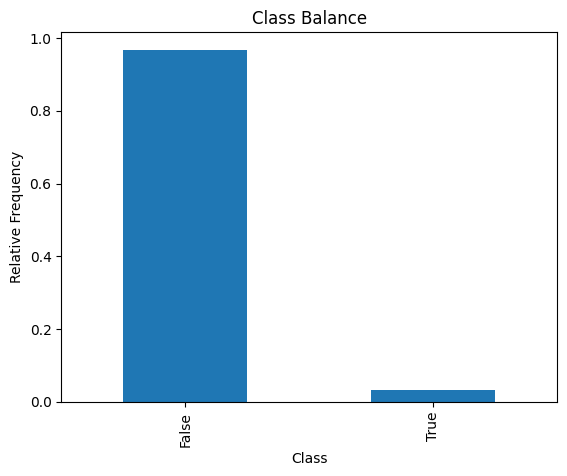

In [ ]:
# Plot class balance
df["bankrupt"].value_counts(normalize=True).plot(
   kind="bar", xlabel="Class", ylabel="Relative Frequency", title="Class Balance"
);

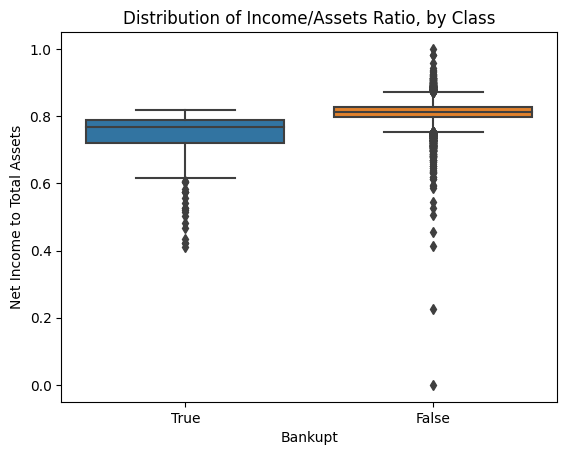

In [ ]:
# Create boxplot that shows the distributions of the 'feat_86' column
sns.boxplot(x = "bankrupt", y = "feat_86", data = df)
plt.xlabel("Bankupt")
plt.ylabel("Net Income to Total Assets")
plt.title("Distribution of Income/Assets Ratio, by Class");

In [ ]:
# Summary statistics for `feat_86`
df["feat_86"]. describe().apply("{0:,.0f}".format)

count    6,819
mean         1
std          0
min          0
25%          1
50%          1
75%          1
max          1
Name: feat_86, dtype: object

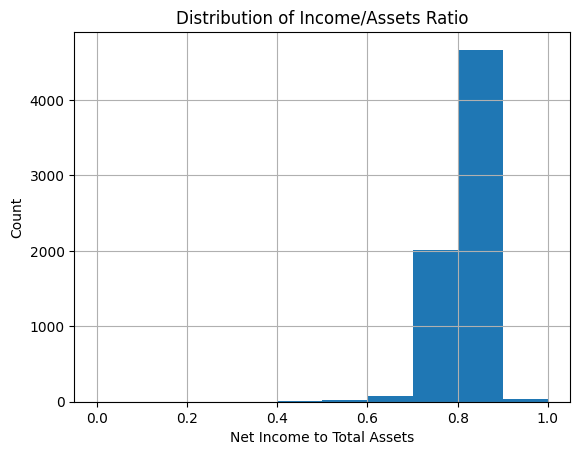

In [ ]:
# Plot histogram of `feat_86`
df["feat_86"].hist()
plt.xlabel("Net Income to Total Assets")
plt.ylabel("Count"),
plt.title("Distribution of Income/Assets Ratio");

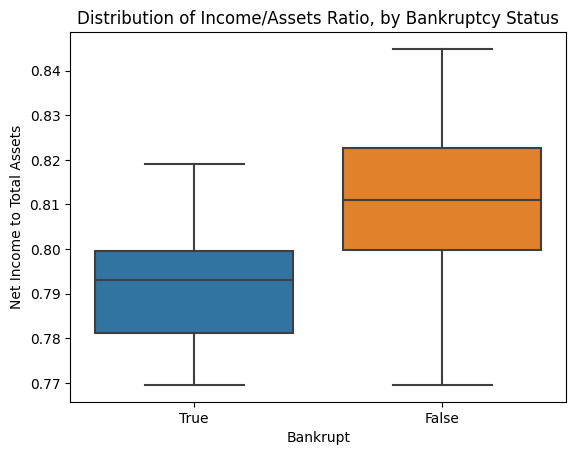

In [ ]:
# Create clipped boxplot to remove outliers
q1, q9 = df["feat_86"]. quantile([0.1, 0.9])
mask = df["feat_86"].between (q1, q9)
sns.boxplot(x = "bankrupt", y= "feat_86", data = df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("Net Income to Total Assets")
plt.title("Distribution of Income/Assets Ratio, by Bankruptcy Status");

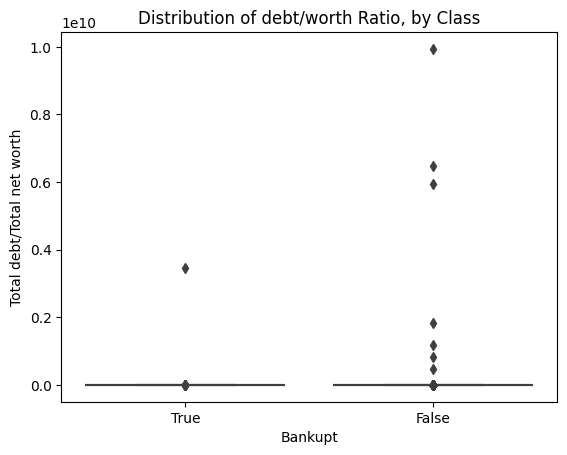

In [ ]:
 # Explore another feature
# Create boxplot that shows the distributions of the 'feat_36' column
sns.boxplot(x = "bankrupt", y = "feat_36", data = df)
plt.xlabel("Bankupt")
plt.ylabel("Total debt/Total net worth")
plt.title("Distribution of debt/worth Ratio, by Class");

In [ ]:
# Summary statistics for `feat_36`
df["feat_36"]. describe().apply("{0:,.0f}".format)

count            6,819
mean         4,416,337
std        168,406,905
min                  0
25%                  0
50%                  0
75%                  0
max      9,940,000,000
Name: feat_36, dtype: object

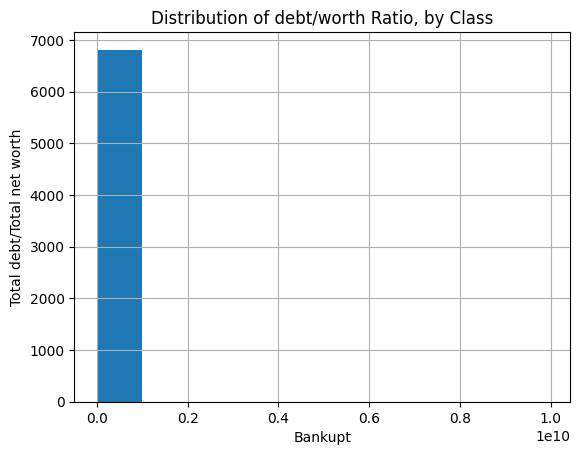

In [ ]:
# Plot histogram of `feat_36`
df["feat_36"].hist()
plt.xlabel("Bankupt")
plt.ylabel("Total debt/Total net worth")
plt.title("Distribution of debt/worth Ratio, by Class");

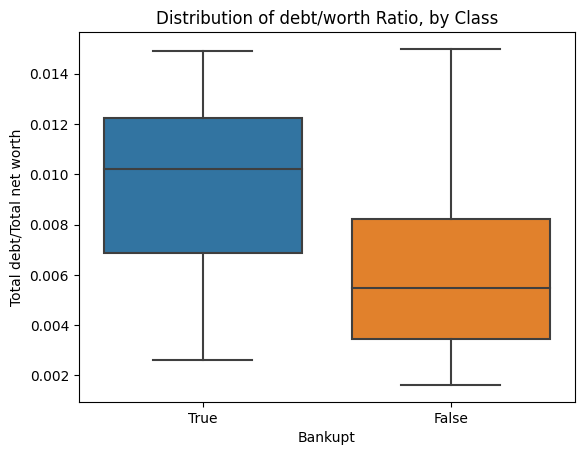

In [ ]:
# Create clipped boxplot to remove outliers
q1, q9 = df["feat_36"]. quantile([0.1, 0.9])
mask_36 = df["feat_36"].between (q1, q9)
sns.boxplot(x = "bankrupt", y= "feat_36", data = df[mask_36])
plt.xlabel("Bankupt")
plt.ylabel("Total debt/Total net worth")
plt.title("Distribution of debt/worth Ratio, by Class");

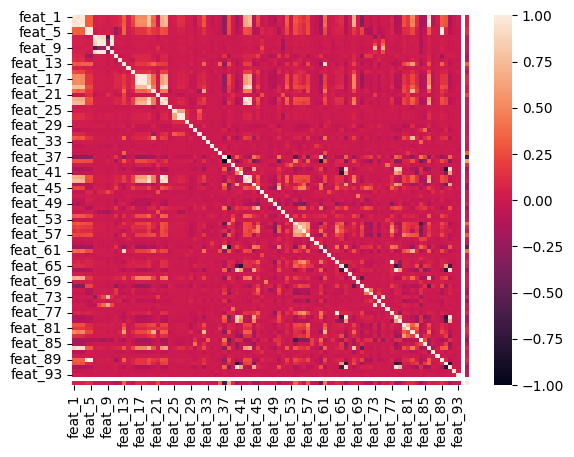

In [ ]:
corr = df.drop(columns="bankrupt").corr()
# Plot heatmap of `correlation`
sns.heatmap(corr);

## Split

In [ ]:
# Create our feature matrix `X` and target vector `y`
target = "bankrupt"
X = df.drop(columns= target)
y = df[target]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6819, 95)
y shape: (6819,)


In [ ]:
# Divide our data (X and y) into training and test sets using a randomized train-test-split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5455, 95)
y_train shape: (5455,)
X_test shape: (1364, 95)
y_test shape: (1364,)


## Resample

In [ ]:
# Create a new feature matrix `X_train_under` and target vector `y_train_under` by performing random under-sampling on our training data
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape)
X_train_under.head()

(338, 95)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95
0,0.547409,0.597580,0.583757,0.604707,0.604707,0.999089,0.797593,0.809456,0.303629,0.781726,...,0.831586,0.001479,0.624287,0.604706,0.842928,0.279743,0.026801,0.565205,1,0.029354
1,0.575196,0.622928,0.609187,0.606142,0.606142,0.999085,0.797859,0.809654,0.304102,0.781934,...,0.845096,0.001891,0.624553,0.606139,0.843117,0.277089,0.026791,0.565159,1,0.050445
2,0.490567,0.552933,0.539483,0.629665,0.629520,0.999108,0.797607,0.809484,0.303613,0.781755,...,0.810341,0.001115,0.624214,0.629664,0.840741,0.275084,0.026791,0.565158,1,0.250781
3,0.543899,0.598779,0.593180,0.602740,0.602754,0.999041,0.797495,0.809399,0.303559,0.781664,...,0.828565,0.001621,0.623379,0.602735,0.843240,0.282201,0.026865,0.565489,1,0.023104
4,0.608980,0.658689,0.655174,0.612491,0.613183,0.999193,0.798374,0.810111,0.304774,0.782440,...,0.867959,0.010567,0.621156,0.612491,0.843773,0.275537,0.026791,0.565158,1,0.123342


In [ ]:
# Create a new feature matrix `X_train_over` and target vector `y_train_over` by performing random over-sampling on our training data
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(10572, 95)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0.801313,0.005821,0.623649,0.599196,0.840580,0.282564,0.027239,0.566658,1,0.022512
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0.810914,0.000481,0.623932,0.609332,0.841339,0.280570,0.026843,0.565395,1,0.026670
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0.809740,0.001397,0.623714,0.614241,0.840969,0.277772,0.026864,0.565484,1,0.041556
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0.810082,0.000998,0.623986,0.597824,0.841885,0.286871,0.026951,0.565820,1,0.018173
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0.804638,0.002826,0.623845,0.600363,0.840885,0.282073,0.026959,0.565848,1,0.023328


#Build Model
##Baseline

In [ ]:
# Calculate the baseline accuracy score for our model
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.969


## Iterate

In [ ]:
# Fit on `X_train`, `y_train`
model_reg = make_pipeline(SimpleImputer(strategy = "median"), DecisionTreeClassifier(random_state=42))
model_reg.fit(X_train, y_train)

# Fit on `X_train_under`, `y_train_under`
model_under = make_pipeline(SimpleImputer(strategy = "median"),DecisionTreeClassifier(random_state=42))
model_under.fit(X_train_under, y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over = make_pipeline(SimpleImputer(strategy = "median"), DecisionTreeClassifier(random_state=42))
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

## Evaluate

In [ ]:
# Calculate the training and testing accuracies for our three models
for m in [model_reg, model_under, model_over]:
     acc_train = m.score(X_train, y_train)
     acc_test = m.score(X_test, y_test)
     print("Training Accuracy:", round(acc_train, 4))
     print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9531
Training Accuracy: 0.813
Test Accuracy: 0.8057
Training Accuracy: 1.0
Test Accuracy: 0.9604


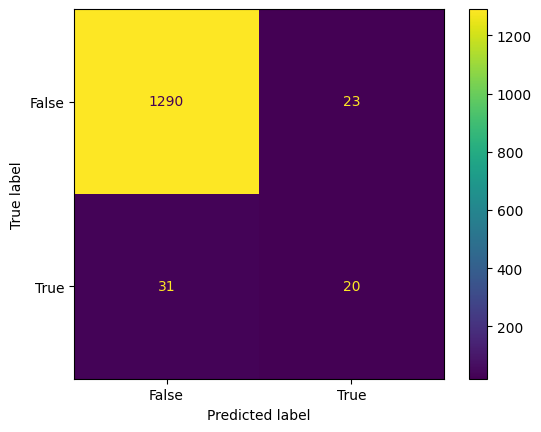

In [ ]:
# Plot confusion matrix shows how our best model performs
ConfusionMatrixDisplay.from_estimator(model_over, X_test, y_test);

In [ ]:
# Determine the depth of the decision tree in `model_over`
depth = model_over.named_steps["decisiontreeclassifier"].get_depth()
print(depth)

53


# Results

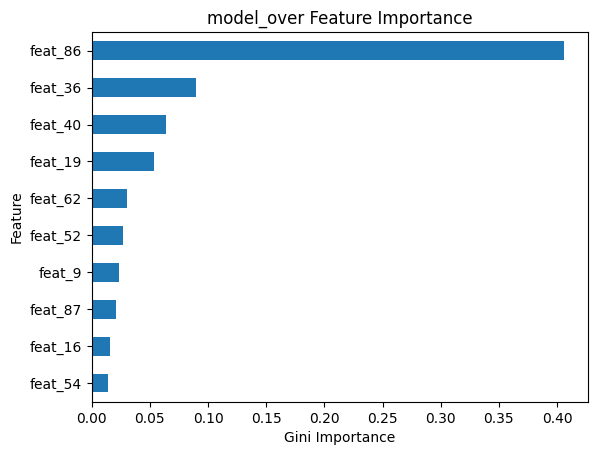

In [ ]:
# Create a horizontal bar chart with the 10 most important features for `model_over`

# Get importances
importances = model_over.named_steps["decisiontreeclassifier"].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train_over.columns).sort_values()

# Plot series
feat_imp.tail(10).plot(kind= "barh")

plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

In [ ]:
# save our best-performing model to a a file named `"model-1.pkl"`
with open("model-1.pkl", "wb") as f:
    pickle.dump(model_over, f)

In [ ]:
# Make sure we’ve saved our model correctly by loading `"dt-model.pkl"` and assigning to the variable `loaded_model`
with open("model-1.pkl", "rb") as f:
     loaded_model = pickle.load(f)
print(loaded_model)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])
